In [2]:
import pickle
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import math
from scipy.stats import f
#%pip install numpy_indexed
import datetime
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

In [3]:
df = pd.read_csv("CleansedDataSets/JuneCleansed.csv")

df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df = df.sort_index()
# df = df[["MDM current (A)", "VDV Pos [%] (%)", "IGV Pos [%] (%)", "Isentropic His (J/kg)", "Phi"]]


df.head(10)

,MDM current (A),VDV Pos [%] (%),IGV Pos [%] (%),Isentropic His (J/kg),Phi
timestamp,,,,,
2022-06-13 21:04:01.318,49.706242,16.0,48.0,50971.509961,0.061416
2022-06-13 21:04:06.318,49.706242,16.0,48.0,50971.645530,0.061229
2022-06-13 21:04:07.143,49.706242,16.0,48.0,50971.698518,0.061505
2022-06-13 21:04:07.148,49.706242,16.0,48.0,50971.403643,0.061894
2022-06-13 21:04:08.559,49.706242,16.0,48.0,51014.102719,0.060715
2022-06-13 21:04:16.319,49.706242,16.0,48.0,51001.668878,0.060715
2022-06-13 21:04:26.319,49.706242,16.0,48.0,51005.858004,0.060715
2022-06-13 21:04:36.320,49.706242,16.0,48.0,51014.903616,0.060715
2022-06-13 21:04:36.936,49.706242,16.0,48.0,51008.813295,0.060715


<AxesSubplot:>

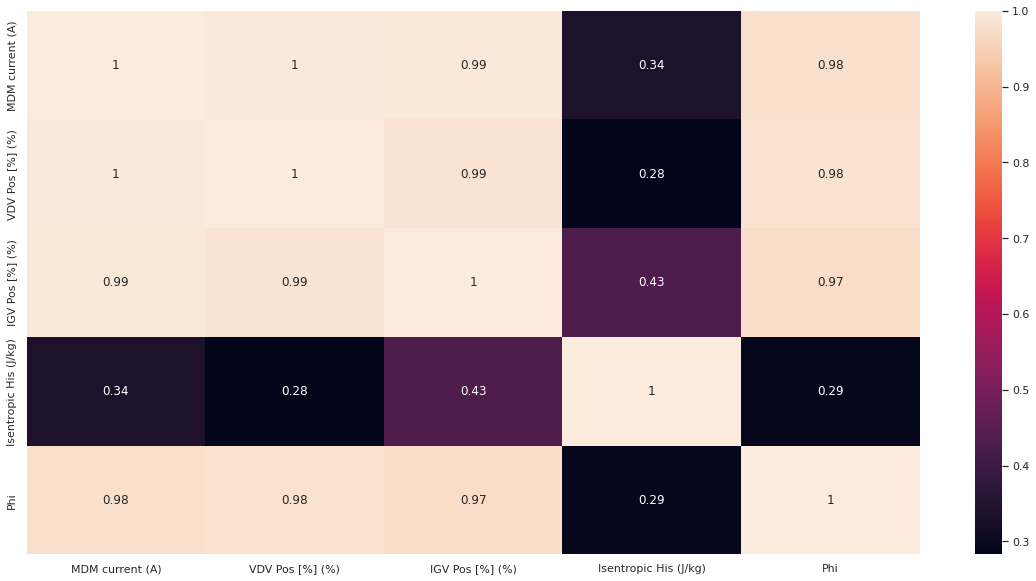

In [4]:
sns.heatmap(df.corr(), annot=True)

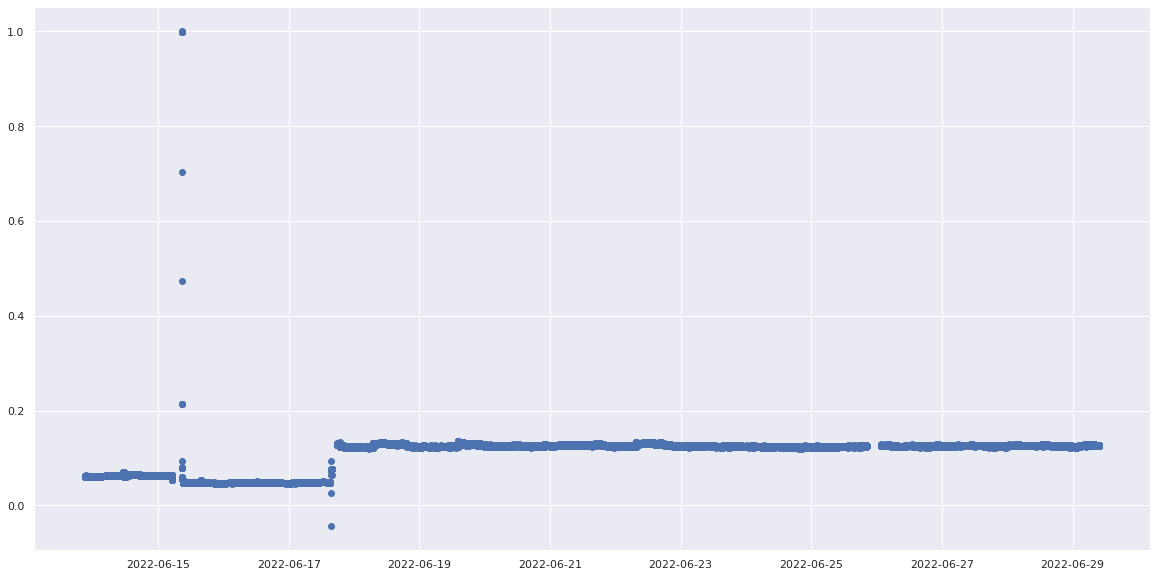

In [6]:
plt.scatter(x=df.index, y=df["Phi"])

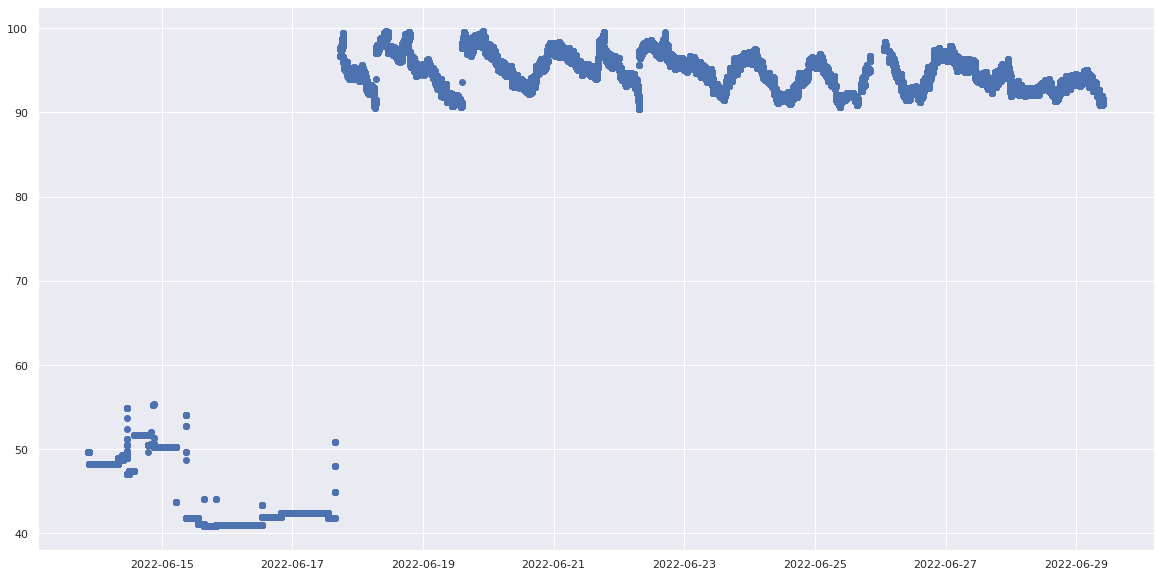

In [7]:
plt.scatter(x=df.index, y=df["MDM current (A)"])

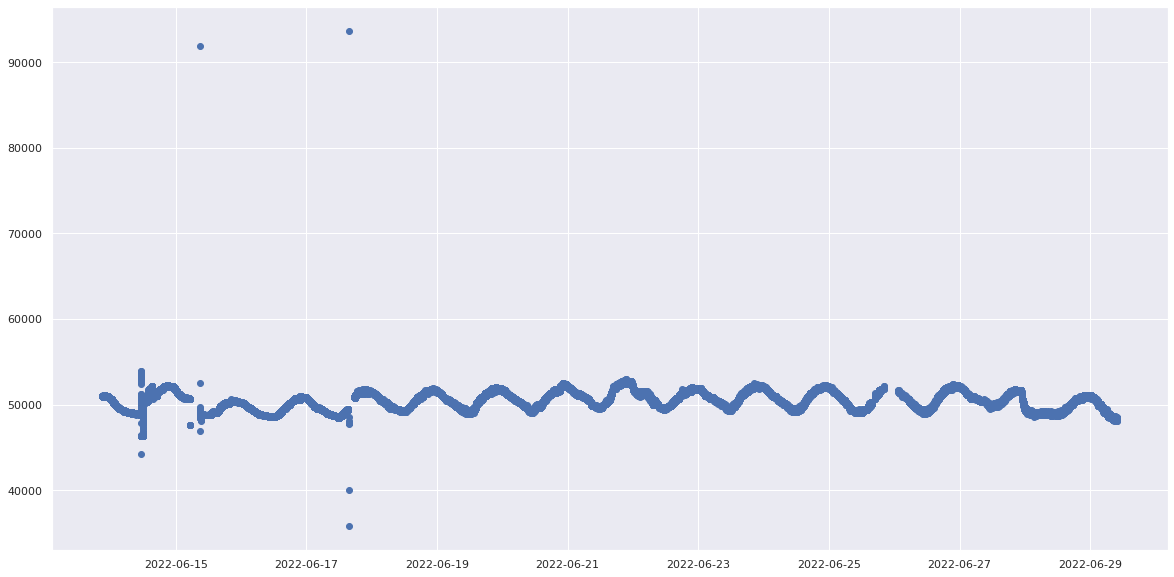

In [8]:
plt.scatter(x=df.index, y=df["Isentropic His (J/kg)"])

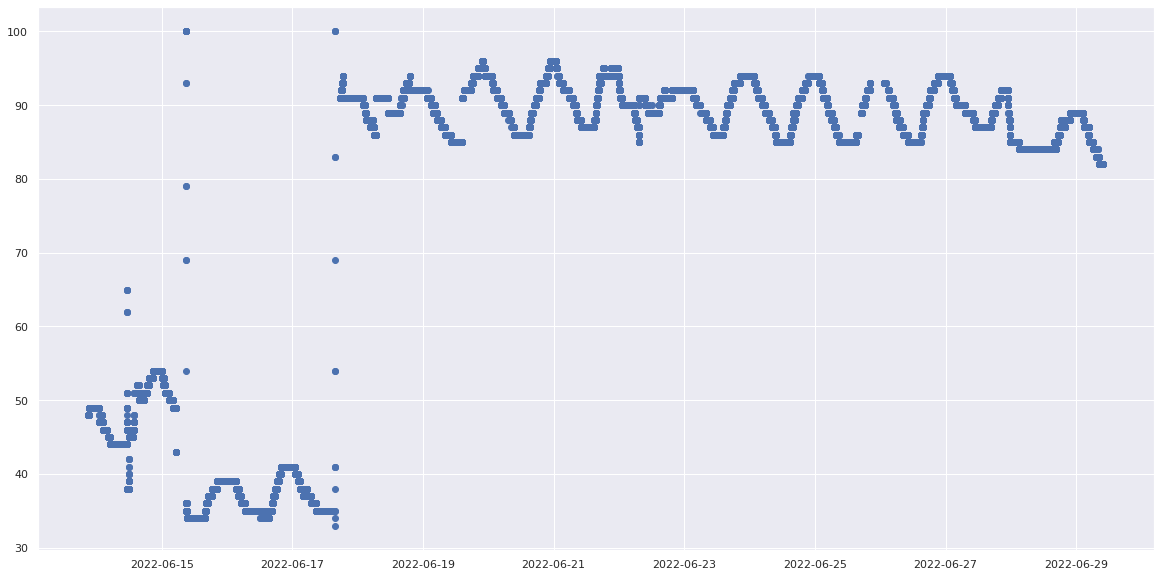

In [9]:
plt.scatter(x=df.index, y=df["IGV Pos [%] (%)"])

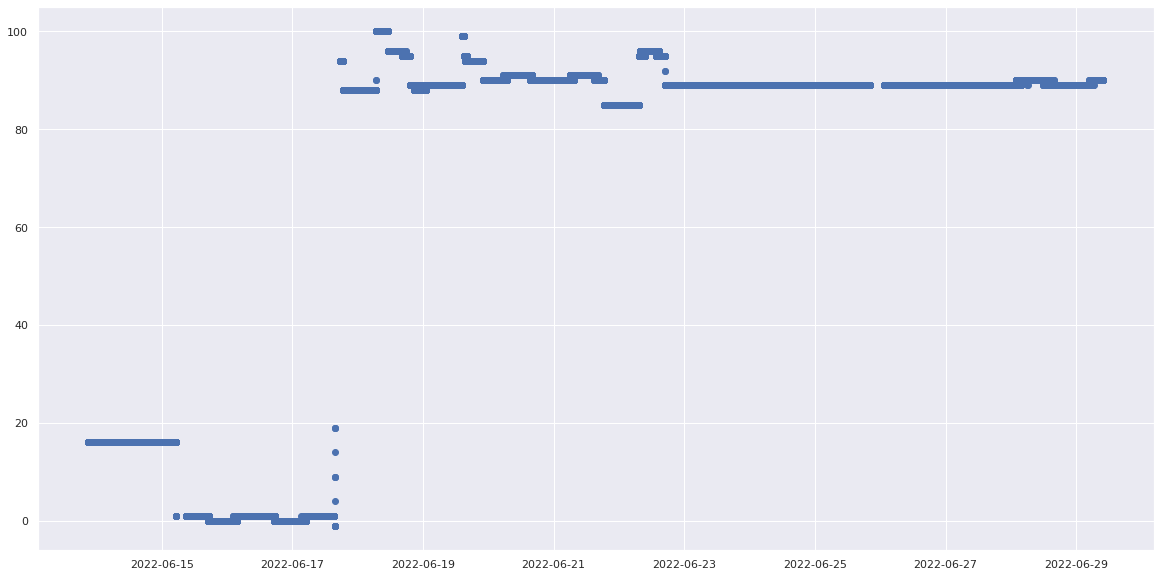

In [10]:
plt.scatter(x=df.index, y=df["VDV Pos [%] (%)"])

In [29]:
# subset1 = df.loc[df.index < "2022-02-01"]
# subset = df.loc[df.index > "2022-02-02"]

In [19]:
df = df.loc[df["Phi"]<0.135]
df = df.loc[df["Phi"]>0.12]

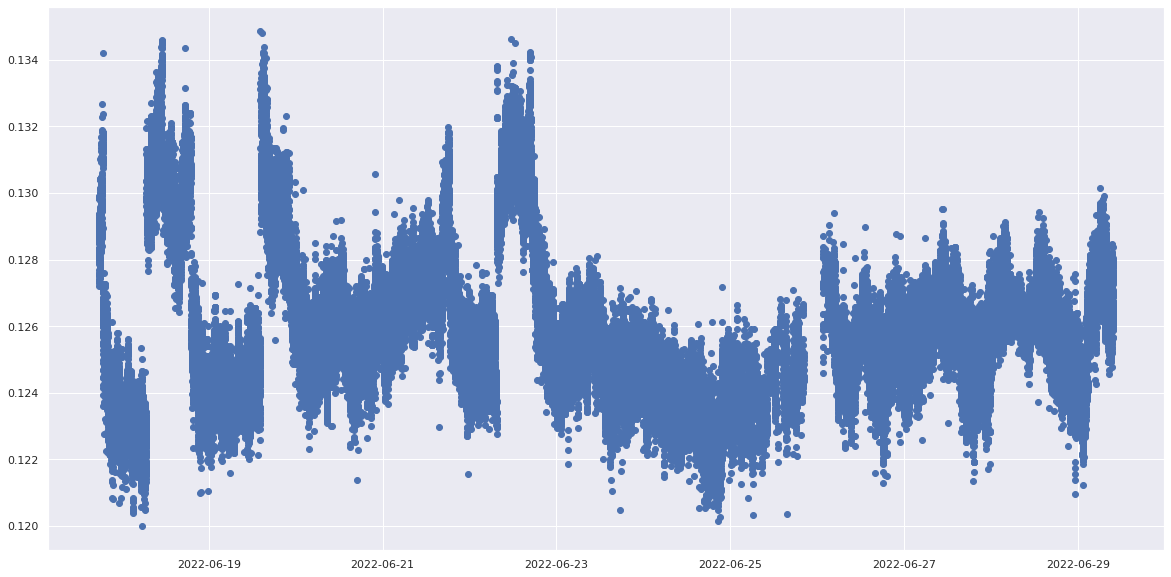

In [20]:
plt.scatter(x=df.index, y=df["Phi"])

In [27]:
df.index

DatetimeIndex(['2022-06-17 17:39:12.457000', '2022-06-17 17:39:17.457000',
               '2022-06-17 17:39:22.457000', '2022-06-17 17:39:25.912000',
               '2022-06-17 17:39:37.458000', '2022-06-17 17:39:42.459000',
               '2022-06-17 17:39:47.459000', '2022-06-17 17:39:52.459000',
               '2022-06-17 17:39:55.624000', '2022-06-17 17:40:06.007000',
               ...
               '2022-06-29 09:49:10.508000', '2022-06-29 09:49:12.883000',
               '2022-06-29 09:49:22.883000', '2022-06-29 09:49:24.093000',
               '2022-06-29 09:49:42.884000', '2022-06-29 09:49:47.885000',
               '2022-06-29 09:49:52.885000', '2022-06-29 09:49:54.136000',
               '2022-06-29 09:49:54.141000', '2022-06-29 09:49:54.326000'],
              dtype='datetime64[ns]', name='timestamp', length=126028, freq=None)

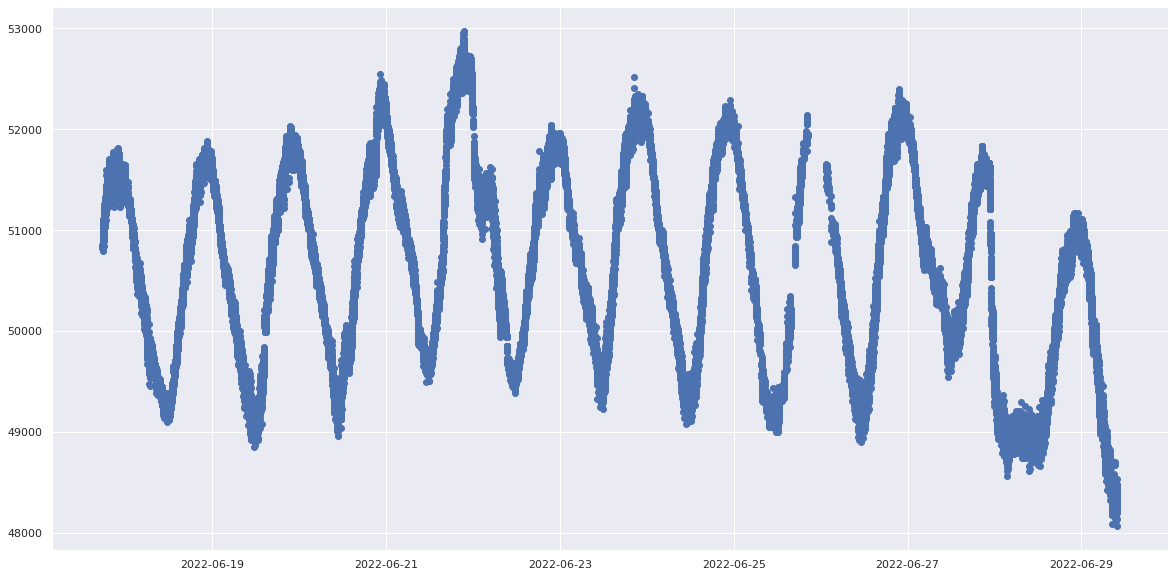

In [21]:
plt.scatter(x=df.index, y=df["Isentropic His (J/kg)"])

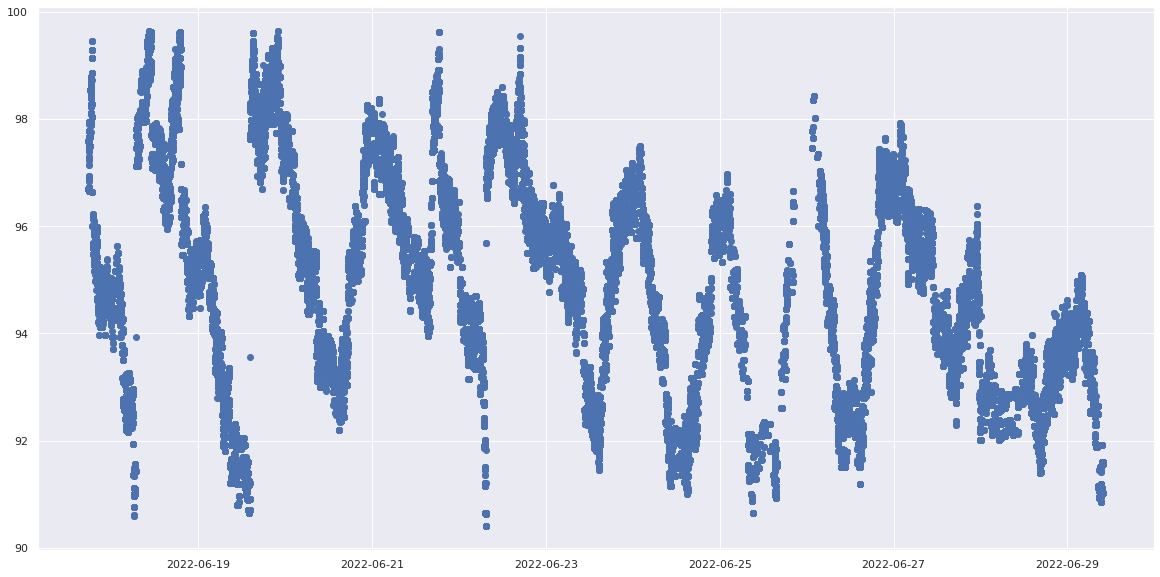

In [22]:
plt.scatter(x=df.index, y=df["MDM current (A)"])

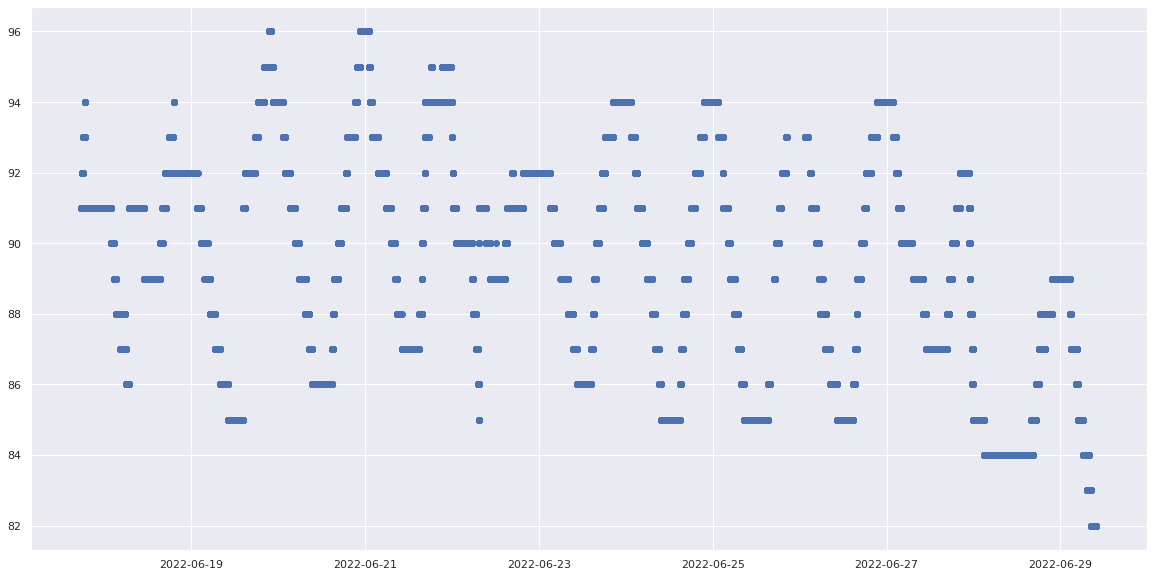

In [23]:
plt.scatter(x=df.index, y=df["IGV Pos [%] (%)"])

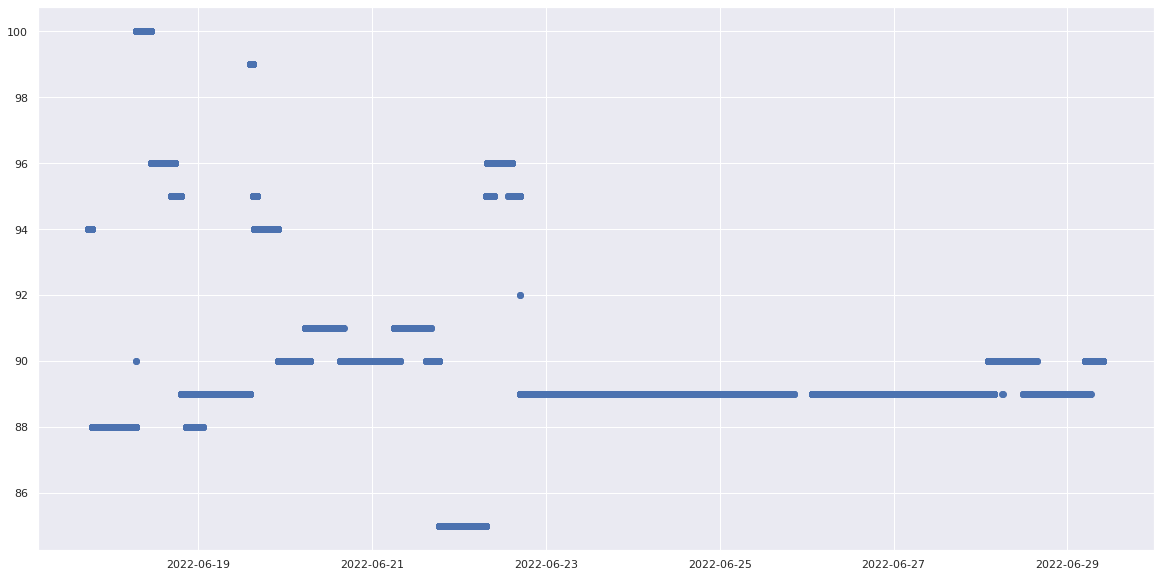

In [24]:
plt.scatter(x=df.index, y=df["VDV Pos [%] (%)"])

In [26]:
df.to_csv("Kmeans/DataSets/ManuallyCleansedJune.csv")